In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import pandas as pd
import sklearn.cluster as skc
from scipy.spatial.distance import cdist
import sys

from utils import utils

In [2]:
RANGE = 10

In [8]:
# Read and shuffle data.
df = pd.read_csv('mission_1.csv')

data = []
for _, d in df.iterrows():
    data.append(d.tolist()[1:])
data = np.array(data)
np.random.shuffle(data)

In [19]:
# Separate actions and query information.
query_attributes = data[:, :-1]
actions = data[:, -1]

In [ ]:
test = data[-1:]
data = data[:-1]

In [9]:
data_norm = utils.min_max_normalization(data)

In [10]:
data

array([[  6.00000000e+00,   4.67560959e-01],
       [  4.00000000e+00,   9.70261313e-02],
       [  2.00000000e+00,   6.79279255e-01],
       [  2.00000000e+00,   5.55433646e-01],
       [  1.00000000e+00,   9.50097407e-01],
       [  2.00000000e+00,   5.34636352e-01],
       [  0.00000000e+00,   5.00881870e-03],
       [  6.00000000e+00,   4.07627500e-04],
       [  0.00000000e+00,   1.09804458e-02],
       [  1.00000000e+00,   5.43797095e-01],
       [  1.00000000e+00,   8.71203621e-01],
       [  5.00000000e+00,   6.16247369e-02],
       [  2.00000000e+00,   1.64416638e-01],
       [  3.00000000e+00,   8.79860150e-01],
       [  2.00000000e+00,   5.13854036e-01],
       [  3.00000000e+00,   8.32103039e-01],
       [  0.00000000e+00,   1.44274851e-01],
       [  6.00000000e+00,   1.28697729e-01],
       [  4.00000000e+00,   5.74593057e-01],
       [  1.00000000e+00,   1.33686552e-01],
       [  3.00000000e+00,   2.59220424e-01],
       [  4.00000000e+00,   8.10956240e-01],
       [  

In [11]:
data_norm

array([[ 0.72715151, -0.19492167],
       [ 0.39381818, -0.25667747],
       [ 0.06048484, -0.15963528],
       [ 0.06048484, -0.18027622],
       [-0.10618182, -0.11449892],
       [ 0.06048484, -0.18374243],
       [-0.27284849, -0.27201369],
       [ 0.72715151, -0.27278055],
       [-0.27284849, -0.27101842],
       [-0.10618182, -0.18221564],
       [-0.10618182, -0.12764789],
       [ 0.56048484, -0.2625777 ],
       [ 0.06048484, -0.24544572],
       [ 0.22715151, -0.12620513],
       [ 0.06048484, -0.18720615],
       [ 0.22715151, -0.13416465],
       [-0.27284849, -0.24880268],
       [ 0.72715151, -0.25139887],
       [ 0.39381818, -0.17708298],
       [-0.10618182, -0.2505674 ],
       [ 0.22715151, -0.22964509],
       [ 0.39381818, -0.13768912],
       [ 0.06048484, -0.22652964],
       [ 0.06048484, -0.11464659],
       [ 0.72715151, -0.12130065],
       [ 0.72715151, -0.19912489],
       [ 0.06048484, -0.23948094],
       [ 0.72715151, -0.25785985],
       [ 0.72715151,

IndexError: index 2 is out of bounds for axis 1 with size 2

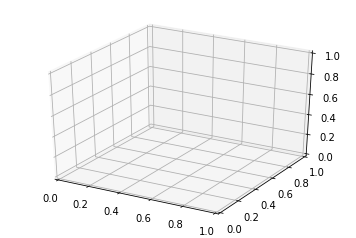

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', marker='o')
ax.set_xlabel('Type')
ax.set_ylabel('Confidence')
ax.set_zlabel('Action')

In [13]:
cluster_inertia = []
for k in xrange(1, RANGE):
    k_means_model = skc.KMeans(n_clusters=k).fit(data)
    cluster_inertia.append(k_means_model.inertia_)
    
print('K Values: ', cluster_inertia)

K Values:  [846.57039026390862, 218.56578781536979, 102.01500062723571, 59.196257547616852, 43.009901536954118, 29.393080895719919, 17.380878184630937, 14.311018330080246, 11.962112189100935]


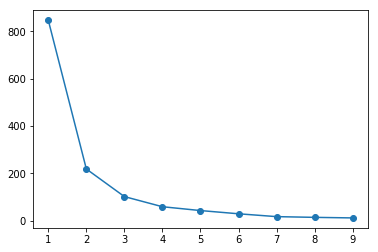

In [14]:
plt.plot(xrange(1, RANGE), cluster_inertia, marker='o')

In [15]:
#k_means_model = skc.KMeans(n_clusters=3).fit(data)
#k_means_model = skc.MiniBatchKMeans(n_clusters=3).fit(data)
#k_means_model = skc.AffinityPropagation(preference=-50).fit(data)
#bandwidth = skc.estimate_bandwidth(data, quantile=0.2, n_samples=50)
#k_means_model = skc.MeanShift(bandwidth=bandwidth, bin_seeding=True)
#k_means_model = skc.DBSCAN(eps=0.1, min_samples=10).fit(data)

centroids = k_means_model.cluster_centers_
labels = k_means_model.labels_

print(centroids)
print(labels)

[[ -8.88178420e-16   7.65665025e-01]
 [  6.00000000e+00   4.37213377e-01]
 [  3.00000000e+00   4.97717406e-01]
 [  1.00000000e+00   4.33592968e-01]
 [  2.00000000e+00   1.97240566e-01]
 [  4.00000000e+00   4.61664699e-01]
 [  5.00000000e+00   4.29775946e-01]
 [  2.00000000e+00   7.51914208e-01]
 [ -8.88178420e-16   2.13912093e-01]]
[1 5 7 7 3 7 8 1 8 3 3 6 4 2 7 2 8 1 5 3 2 5 4 7 1 1 4 1 1 5 3 1 3 5 1 1 8
 4 5 0 2 3 4 7 5 4 5 5 5 1 2 7 0 3 6 3 6 3 1 2 5 6 3 3 7 7 3 3 5 4 5 5 6 6
 0 6 1 1 6 3 3 1 2 5 5 8 2 4 2 2 6 6 4 7 6 6 1 3 4 5 1 7 2 6 7 5 8 2 4 3 3
 6 6 2 4 0 8 4 1 2 3 3 7 6 3 7 6 8 5 2 4 0 7 6 6 7 3 1 1 2 0 7 1 4 2 8 0 2
 3 1 2 3 6 4 0 3 3 7 0 8 3 2 6 2 1 6 8 1 7 7 4 2 8 2 4 0 0 5 0 4 1 5 0 0 2
 0 6 3 3 1 8 5 3 2 5 0 1 3 7 1 6 5 2 0 1 0 0]


IndexError: index 2 is out of bounds for axis 0 with size 2

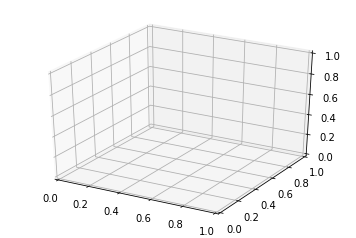

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in xrange(data.shape[0]):
    if labels[i] == 0:
        ax.scatter(data[i][0], data[i][1], data[i][2], c='r', marker='o')
    elif labels[i] == 1:
        ax.scatter(data[i][0], data[i][1], data[i][2], c='b', marker='o')
    elif labels[i] == 2:
        ax.scatter(data[i][0], data[i][1], data[i][2], c='g', marker='o')
ax.set_xlabel('Type')
ax.set_ylabel('Confidence')
ax.set_zlabel('Action')

In [17]:
centroid_shape = centroids.shape[0]

prototypes = np.zeros((centroid_shape, 2))

for i in xrange(centroid_shape):
    for j in xrange(labels.shape[0]):
        if labels[j] == i:
            dist = np.linalg.norm(centroids[i] - data[j])
            
            if not prototypes[i][1]:
                prototypes[i][0] = j
                prototypes[i][1] = dist
                continue
                
            if dist < prototypes[i][1]:
                prototypes[i][0] = j
                prototypes[i][1] = dist
                
prototypes

array([[  1.95000000e+02,   4.88276205e-03],
       [  2.50000000e+01,   5.12823490e-03],
       [  8.80000000e+01,   1.81739315e-02],
       [  6.20000000e+01,   3.85817902e-02],
       [  2.60000000e+01,   2.96476297e-03],
       [  8.40000000e+01,   2.13512670e-02],
       [  1.34000000e+02,   1.48681675e-02],
       [  6.50000000e+01,   1.83671620e-02],
       [  1.06000000e+02,   2.02801425e-02]])

In [18]:
for i in xrange(prototypes.shape[0]):
    print(data[int(prototypes[:, 0][i])])

[ 0.          0.77054779]
[ 6.          0.44234161]
[ 3.          0.51589134]
[ 1.          0.39501118]
[ 2.          0.20020533]
[ 4.          0.44031343]
[ 5.          0.44464411]
[ 2.          0.77028137]
[ 0.          0.23419224]


### The robot [action] when presented with a [type] query with a confidence [confidence]%.
### Which action would you prefer for the robot to make next time:
### 1 - Same action
### 2, 3 - Next two

In [17]:
def display_question(survey):
    print(survey[-1])
    sys.stdout.write('The robot ')
    if int(survey[-1]) == 0:
        sys.stdout.write('was fully autonomous')
    elif int(survey[-1]) == 1:
        sys.stdout.write('stopped and waited for your input')
    elif int(survey[-1]) == 2:
        sys.stdout.write('continued its task and asked for your answer later')

    sys.stdout.write(' when presented with a ')

    if int(survey[0]) == 0:
        sys.stdout.write('visual')
    elif int(survey[0]) == 1:
        sys.stdout.write('tagging')
    elif int(survey[0]) == 2:
        sys.stdout.write('path')
    elif int(survey[0]) == 3:
        sys.stdout.write('communication')
    elif int(survey[0]) == 4:
        sys.stdout.write('robot health')
    elif int(survey[0]) == 5:
        sys.stdout.write('audio')
    elif int(survey[0]) == 6:
        sys.stdout.write('task')

    sys.stdout.write(' query with a confidence of ')

    sys.stdout.write('{}%\n'.format(int(survey[1]*100)))

In [18]:
def survey_func(survey):
    display_question(survey)
    
    sys.stdout.write('Which action would you prefer for the robot to make next time:\n')
    sys.stdout.write('1 - Same action\n')
    if int(survey[-1]) == 0:
        sys.stdout.write('2 - Stop and ask\n')
        sys.stdout.write('3 - Continue but still ask\n')
        
        result = input()
        if result == 1:
            return 0
        elif result == 2:
            return 1
        elif result == 3:
            return 2
    elif int(survey[-1]) == 1:
        sys.stdout.write('2 - Fully autonomous\n')
        sys.stdout.write('3 - Continue but still ask\n')
        
        result = input()
        if result == 1:
            return 1
        elif result == 2:
            return 0
        elif result == 3:
            return 2
    elif int(survey[-1]) == 2:
        sys.stdout.write('2 - Fully autonomous\n')
        sys.stdout.write('3 - Stop and ask\n')
        
        result = input()
        if result == 1:
            return 2
        elif result == 2:
            return 0
        elif result == 3:
            return 1

In [19]:
cluster_labels = dict()
for p in prototypes[:, 0]:
    preferred_action = survey_func(data[int(p)])
    cluster_labels[labels[int(p)]] = preferred_action

-0.235311732919
The robot was fully autonomous when presented with a visual query with a confidence of -21%
Which action would you prefer for the robot to make next time:
1 - Same action
2 - Stop and ask
3 - Continue but still ask
2
-0.235311732919
The robot was fully autonomous when presented with a visual query with a confidence of -18%
Which action would you prefer for the robot to make next time:
1 - Same action
2 - Stop and ask
3 - Continue but still ask


KeyboardInterrupt: 

In [12]:
cluster_labels

{0: 2, 1: 0, 2: 1}

In [13]:
for t in test:
    c_predict = k_means_model.predict([t])[0]
    action = cluster_labels[c_predict]
    if t[-1] != action:
        print('Before:')
        display_question(t)
        t[-1] = action
        print('After:')
        display_question(t)
        print()

Before:
0.0
The robot was fully autonomous when presented with a path query with a confidence of 27%
After:
1.0
The robot stopped and waited for your input when presented with a path query with a confidence of 27%



colors = ["g.", "r.", "c.", "y."]

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], colors[labels[i]], markersize=10)

plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, linewidths=1, zorder=10)